# Problem Statement: To determine the 3 types of wine based on different attributes of wine

## Souce of Data: Kaggle

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
import umap.umap_ as umap

## Explore Data

In [2]:
wine = pd.read_csv('/Users/marcmaestri/Downloads/wine-clustering.csv')

In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


### Check Distribution of Wine Data using Histograms

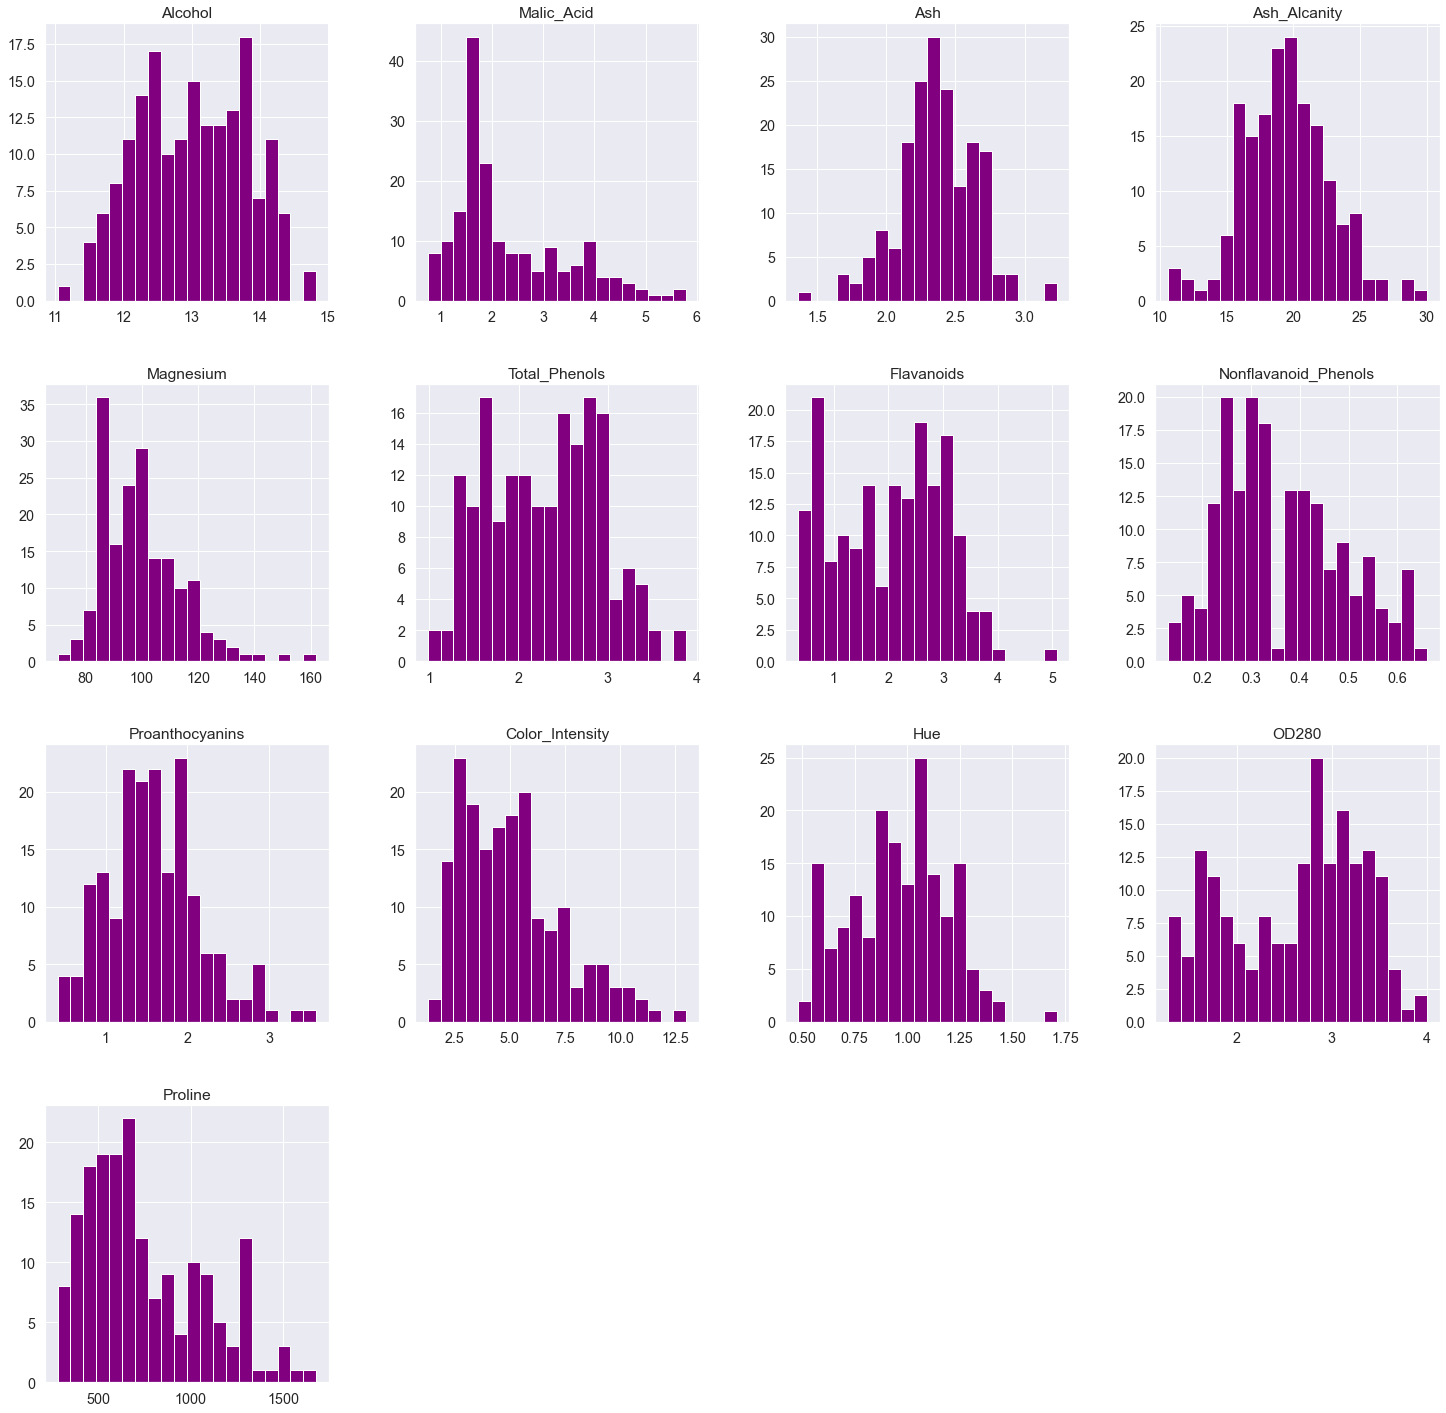

In [4]:
sns.set(style='darkgrid',font_scale=1.3, rc={'figure.figsize':(25,25)})
ax=wine.hist(bins=20,color='purple' )

### Check correlation amongst the wine attributes

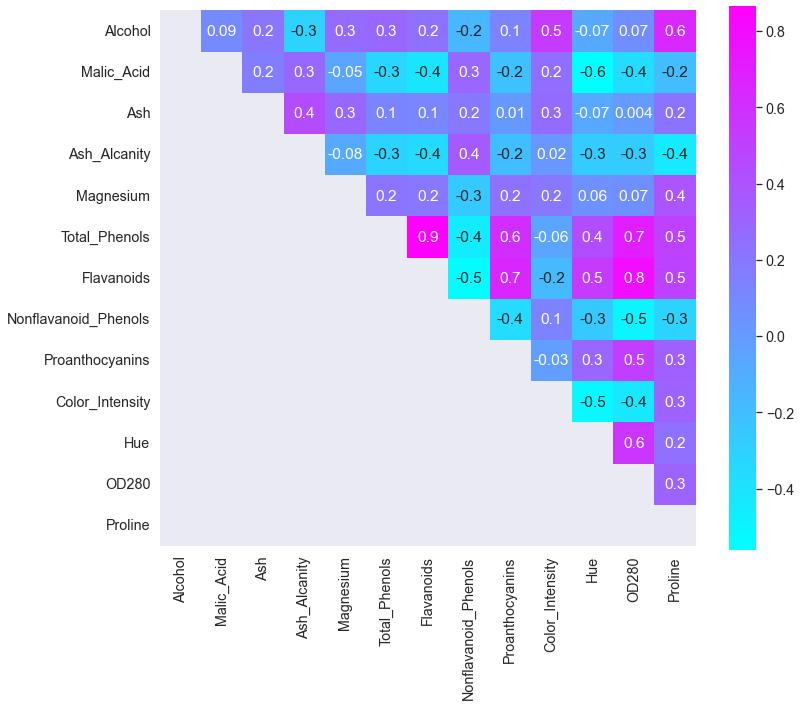

In [5]:
plt.figure(figsize=(12, 10))
mask = np.tril(wine.corr())
sns.heatmap(wine.corr(), cmap="cool", annot=True, fmt='.1g' ,square=True, mask=mask);

### Tends the darker the wine, likely the more alcohol. Also some correlation between alcohol chemicals

## KMeans for Clustering

In [6]:
WCSS = []

In [7]:
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=10)
    kmeans.fit(wine)
    WCSS.append(kmeans.inertia_)
print(WCSS)

[17592296.383508474, 4543749.614531863, 2370689.686782968, 1333139.2086165315, 916379.1871539169, 647326.0020260846, 412137.50910045847, 323223.24705426674, 271004.3476416466]


### Plotting to check the variation in WCSS with change in number of clusters

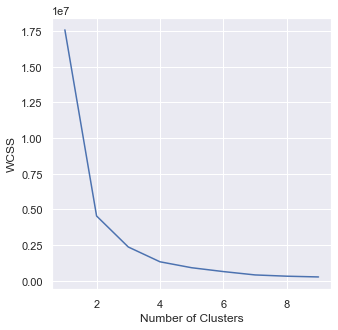

In [8]:
sns.set()
plt.figure(figsize=(5,5))
plt.plot(range(1,10),WCSS)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#### We can see that with increase in the number of clusters, WCSS is decreasing. But we will consider 3 clusters which looks optimal to us

## Training Model

In [9]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=9)
y =kmeans.fit_predict(wine)
y

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0], dtype=int32)

In [10]:
y = y.astype(np.int64)

In [11]:
wine['Cluster'] = y

### Plot to see the distribution of wine data in relation with the Clusters

In [12]:
wine.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Cluster'],
      dtype='object')

In [13]:
l = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']

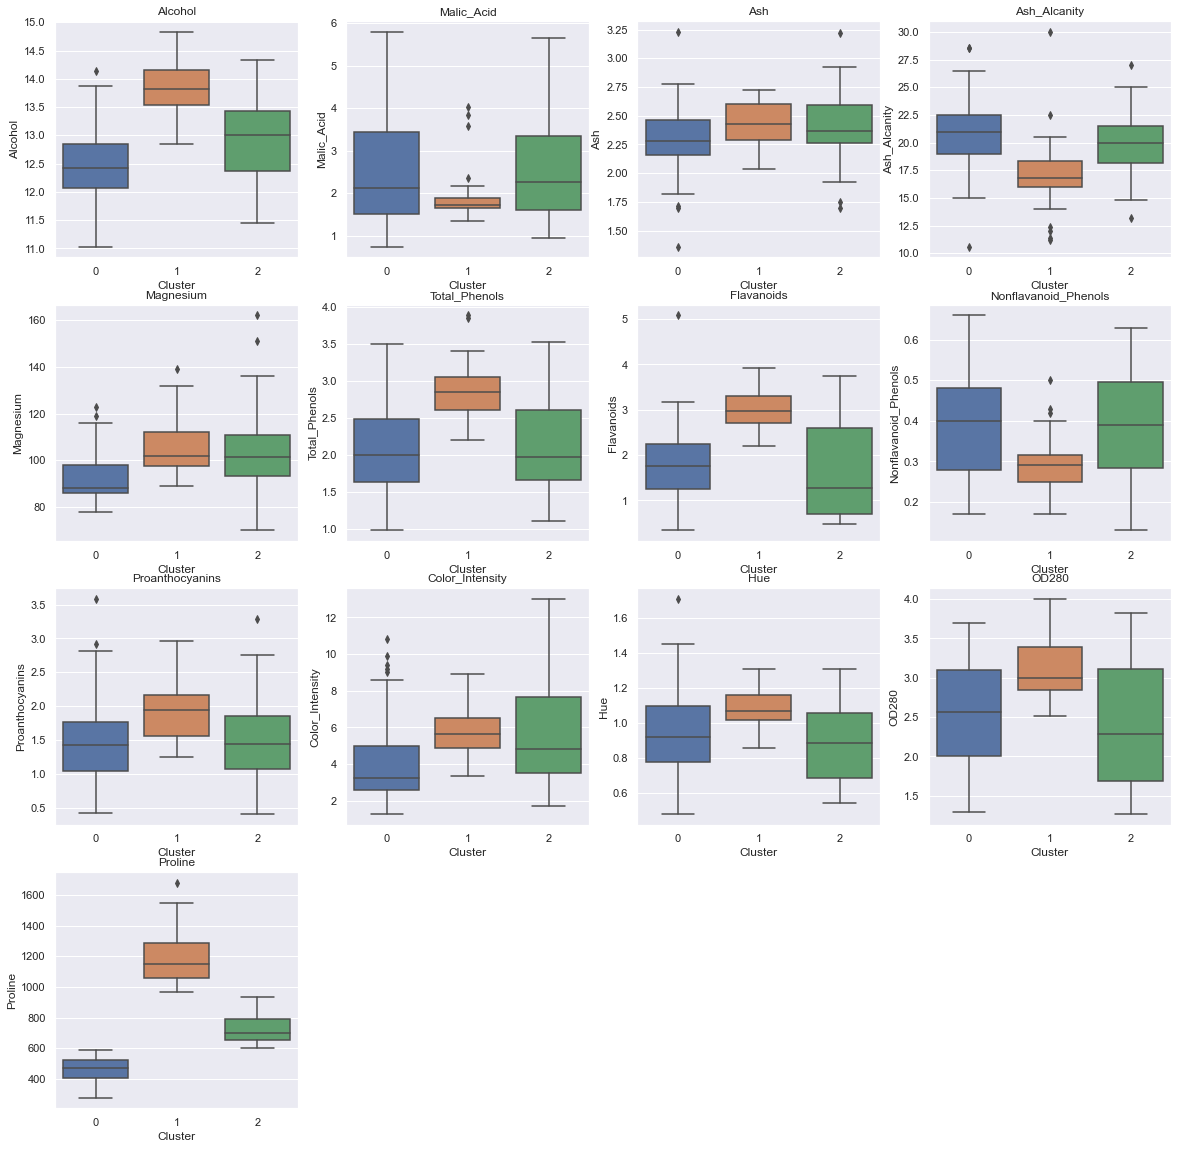

In [14]:
plt.figure(figsize=(20,20))
for i in range(len(l)):
    plt.subplot(4,4,i+1)
    sns.boxplot(data = wine, x = 'Cluster',y = wine[l[i]])
    plt.title(l[i])

#### Findings: While I do not know much about the content of wine, it seems cluster 1 which has the higher of alcohol content, tends to have a signifcant difference than both other clusters in most attributes (less maltic acid, less ash alcanity, more total phenols, more flavanoids, less non flavanoid phenols, more proanthocyanins, more OD280, and more proline). 

In [15]:
#name and show the clusters 
wine0=wine[wine['Cluster']==0]
wine1=wine[wine['Cluster']==1]
wine2=wine[wine['Cluster']==2]

In [16]:
wine0

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
59,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.950000,1.05,1.82,520,0
61,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.750000,0.98,1.59,450,0
63,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.450000,1.22,2.87,420,0
64,12.17,1.45,2.53,19.0,104,1.89,1.75,0.45,1.03,2.950000,1.45,2.23,355,0
66,13.11,1.01,1.70,15.0,78,2.98,3.18,0.26,2.28,5.300000,1.12,3.18,502,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,12.85,3.27,2.58,22.0,106,1.65,0.60,0.60,0.96,5.580000,0.87,2.11,570,0
165,13.73,4.36,2.26,22.5,88,1.28,0.47,0.52,1.15,6.620000,0.78,1.75,520,0
170,12.20,3.03,2.32,19.0,96,1.25,0.49,0.40,0.73,5.500000,0.66,1.83,510,0
171,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470,0


In [17]:
wine1

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1
10,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510,1


In [18]:
wine2

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
19,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845,2
20,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780,2
21,12.93,3.80,2.65,18.6,102,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770,2
24,13.50,1.81,2.61,20.0,96,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660,2
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2


In [19]:
#scale data
wine = StandardScaler().fit_transform(wine)
wine = PowerTransformer(standardize=False).fit_transform(wine)

In [20]:
#reduce to 2D to plot results using UMAP
labels_1 = KMeans(n_clusters=3, random_state=9).fit_predict(wine)
reducer_2 = umap.UMAP(n_components=2, n_neighbors=15, n_jobs=-1, random_state=9)
wine2 = reducer_2.fit_transform(wine)

## PCA with KMeans 

In [21]:
# plot cluster

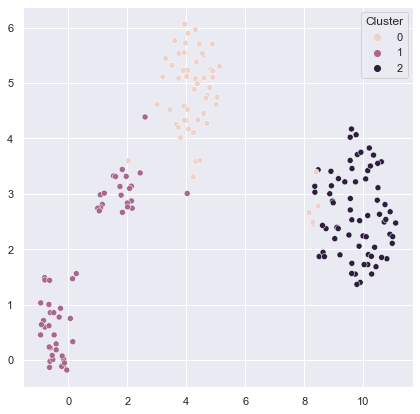

In [22]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=wine2[:, 0], y=wine2[:, 1], hue=labels_1)
plt.legend(title="Cluster")
plt.show()

In [23]:
#PCA
pca_2 = PCA(n_components=10, random_state=9).fit(wine)

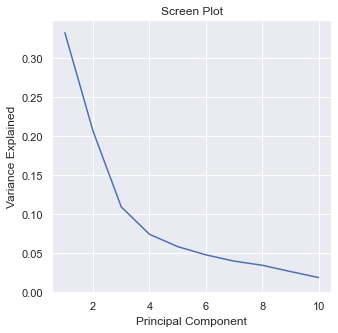

In [24]:
#check how many components to explain
princ_comp = np.arange(pca_2.n_components_, dtype=int) + 1

fig, axs = plt.subplots(figsize=(5,5))
sns.lineplot(x=princ_comp, y=pca_2.explained_variance_ratio_)
plt.title('Screen Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(bottom=0)
plt.show()

In [25]:
# run pca with 2 components
wine3 = PCA(n_components=2, random_state=9).fit_transform(wine)

In [27]:
wine3 = pd.DataFrame(wine3, columns=["pc1", "pc2"])

In [28]:
wine3.head()

,pc1,pc2
0,-3.391183,-1.122969
1,-2.234455,0.175807
2,-2.384444,-0.879715
3,-3.711922,-2.049671
4,-1.082470,-1.359666


In [32]:
#cluster check
inertias = []
for i in range(1,12):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=9)
    kmeans.fit(wine3)
    inertias.append(kmeans.inertia_)
print(inertias)

[1281.3645300434525, 650.7559189747171, 254.48519181116512, 199.07884829044957, 161.70227664988585, 132.27107376880105, 113.69265971590407, 97.55819816708292, 86.36472567020917, 74.77660494720115, 68.3958728266692]


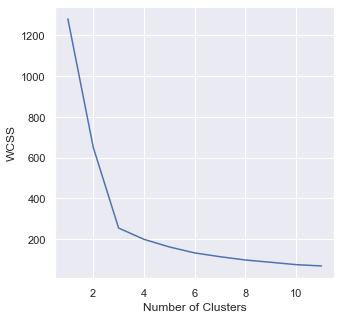

In [33]:
#plot to see how many clusters needed
sns.set()
plt.figure(figsize=(5,5))
plt.plot(range(1,12),inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
# 3 clusters looks good (elbow)
labels_2 = KMeans(n_clusters=3, random_state=9).fit_predict(wine3)

In [35]:
# use same reduced UMAP
reducer_2 = umap.UMAP(n_components=2, n_neighbors=15, n_jobs=-1, random_state=9)
wine4 = reducer_2.fit_transform(wine3)

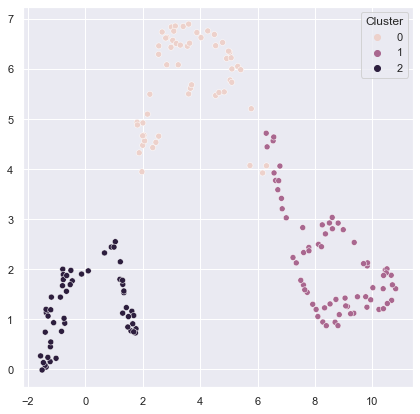

In [37]:
#plot cluster
plt.figure(figsize=(7,7))
sns.scatterplot(x=wine4[:, 0], y=wine4[:, 1], hue=labels_2)
plt.legend(title="Cluster")
plt.show()

In [38]:
# reduce again
reducer_3 = umap.UMAP(n_components=2, n_neighbors=15, n_jobs=-1, random_state=9)
wine5 = reducer_3.fit_transform(wine)

In [39]:
#create components cloumn
X = pd.DataFrame(wine5, columns=["comp_1", "comp_2"])
X.head()

,comp_1,comp_2
0,9.898224,1.399196
1,9.035859,2.189321
2,10.500560,3.108728
3,10.801689,1.826801
4,9.557457,4.020087


In [40]:
inertias_3 = []
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=9)
    kmeans.fit(X)
    inertias_3.append(kmeans.inertia_)
print(inertias_3)

[3365.999755859375, 951.2144775390625, 269.44500732421875, 140.8585205078125, 105.08403015136719, 82.92424011230469, 65.66419219970703, 58.37281036376953, 51.67033004760742]


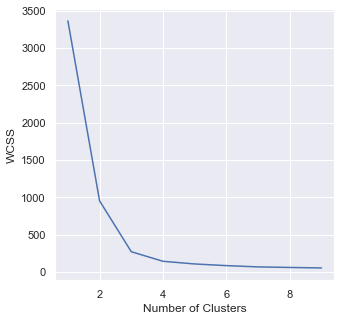

In [41]:
sns.set()
plt.figure(figsize=(5,5))
plt.plot(range(1,10),inertias_3)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:
# use 3 clusters 
labels_3 = KMeans(n_clusters=3, random_state=9).fit_predict(X)

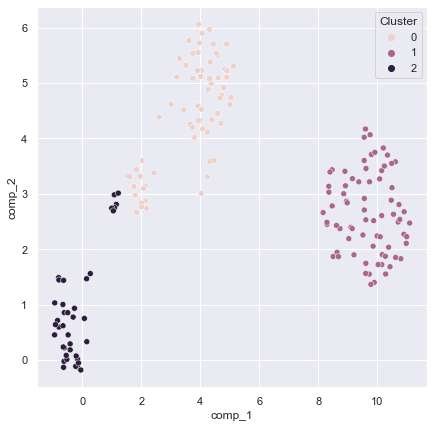

In [43]:
#plot clusters with 2 components
plt.figure(figsize=(7,7))
sns.scatterplot(data=X, x="comp_1", y="comp_2", hue=labels_3)
plt.legend(title="Cluster")
plt.show() 